Make sure the right version of kaggle is installed. The commented parts of this notebook have to be executed only once

In [0]:
# !pip uninstall -y kaggle
# !pip install --upgrade pip
# !pip install kaggle==1.5.6
# !kaggle -v
# !pip install kaggleDownloader

In [0]:
# from kaggleDownloader import get_dataset
import os
from google.colab import drive

In [0]:
os.environ["KAGGLE_USERNAME"] = "your_username_here"
os.environ["KAGGLE_KEY"] = "your_key_here"

In [4]:
# download kaggle.json and upload it on drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# copy kaggle.json to cwd
# !cp drive/My\ Drive/kaggle.json /content

In [0]:
# one way to download the data
# downloads only test files for some reason
# get_dataset("kaggle competitions download -c rsna-intracranial-hemorrhage-detection")

In [0]:
# another way to download data, doesn't fir in colab disk space
# !kaggle competitions download -c rsna-intracranial-hemorrhage-detection

In [9]:
# download jeremy's clean dataset
!kaggle datasets download -d jhoward/rsna-hemorrhage-jpg --force

100% 3.81G/3.82G [02:37<00:00, 45.3MB/s]
100% 3.82G/3.82G [02:37<00:00, 26.0MB/s]


In [10]:
%ls

drive/  rsna-hemorrhage-jpg.zip  sample_data/


In [11]:
%ls drive/My\ Drive/

 clean-data/  'Colab Notebooks'/  'Getting started.pdf'   kaggle.json


In [0]:
# make a folder on drive to upload it, takes too long
!mkdir drive/My\ Drive/rsna-data

# upload it on colab disk, goes away everytime session expires
# !mkdir rsna-data

In [0]:
%mv rsna-hemorrhage-jpg.zip drive/My\ Drive/

In [14]:
%cd drive/My\ Drive
%ls

/content/drive/My Drive
 clean-data/        'Getting started.pdf'   rsna-data/
'Colab Notebooks'/   kaggle.json            rsna-hemorrhage-jpg.zip


In [15]:
!pip install fastai2

     |████████████████████████████████| 184kB 3.4MB/s 


In [0]:
from fastai2.vision.all import *

In [0]:
from zipfile import ZipFile
with ZipFile('rsna-hemorrhage-jpg.zip', 'r') as archive:
  archive.extractall('rsna-data')

In [22]:
fn = get_image_files('rsna-data/train_jpg/train_jpg/')
len(fn)

194082

In [23]:
!pip install pydicom

     |████████████████████████████████| 35.3MB 125kB/s 


(256, 256)


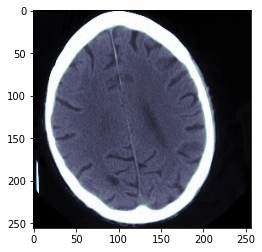

In [24]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pydicom
import glob
import pandas as pd

im = np.array(Image.open('rsna-data/train_jpg/train_jpg/ID_2dfa9f6f8.jpg').convert('L'))
print(im.shape)
plt.imshow(im, cmap=plt.cm.bone);